# Анализ данных продаж видео игр

В нашем распоряжении есть данные из открытых источников о продажах игр. Файл содержит название игры, платформу, год выпуска, жанр, продажи в млн копий по регионам (Северная Америка, Европа, Япония, другие страны), оценки пользователей и экспертов, рейтинг организации ESRB (возрастная категория).

Цель исследования - выявить закономерности, определяющие успешность игр, чтобы спланировать компанию на 2017 год.

Исследование пройдет в пять этапов:
1. Обзор данных
2. Предобработка данных
3. Исследовательский анализ данных (включая актуализацию данных)
4. Исследование предпочтений пользователей
5. Проверка гипотез

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from scipy import stats as st

### Обзор данных

In [2]:
# Загрузим данные
data = pd.read_csv('games.csv')

In [3]:
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Вывод:** в файле данных содержится 16715 строк, 11 столбцов. Типы данных - float64 (6 столбцов), object (5 столбцов). Названия столбцов информативны, на одном языке, содержат заглавные буквы, без пробелов. В данных есть пропуски. У столбцов 'Year_of_Release' и 'User_Score' некорректный тип данных.

### Предобработка данных

#### Приведение заголовков столбцов к нижнему регистру

In [4]:
# Приведем заголовки столбцов к нижнему регистру
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** в изначальном файле данных заголовки столбцов содержали заглавные буквы. Привели названия столбцов к стандартному виду.

#### Обработка пропусков

In [5]:
# Проверим данные на пропуски
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В данных есть пропуски. Изучим их.

##### Пропуски в столбце 'name'

In [6]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Две строки без названия игр. Данных для заполнения нет, удалим эти строки.

In [7]:
data = data.dropna(subset=['name'])
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Пропуски в столбце 'name' удались. Так же видим, что пропали 2 пропуска в столбце 'genre' - они были в тех же строках.

##### Пропуски в столбце 'year_of_release'

In [8]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


269 пропусков. Данных для заполнения пропусков нет и число пропусков значительно меньше общего числа строк. Удалим строки с пропусками.

In [9]:
data = data.dropna(subset=['year_of_release'])

##### Пропуски в столбце 'rating'

In [10]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В столбце 'rating' 6676 пропусков. Рейтинг присваивается организацией ESRB для США и Канады и соответствует возрастной категории. Пропуски, вероятно, связаны с тем, у нас данные не только для США и Канады, но для всего мира. Заменим пропуски заглушкой - значением NoRating.

In [11]:
data['rating'] = data['rating'].fillna('NoRating')
data['rating'].unique()

array(['E', 'NoRating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

##### Пропуски в столбцах 'critic_score' и 'user_score'

In [12]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

У нас остались пропуски в столбцах 'critic_score' и 'user_score' - оценка критиков и пользователей. Данных, для заполнения пропусков нет. В то же время пропусков много - 8461 и 6605, это почти половина данных, поэтому удалять их нельзя. Оставим пропуски как есть.

**Вывод:** были выявлены пропуски в данных. В столбцах 'name' и 'year_of_release' были обнаружены пропуски, данных для заполнения не было, удалили строки. Пропуски в столбце 'rating' заменили заглушкой 'NoRating'. В столбцах 'critic_score' и 'user_score' много пропусков, данных для заполнения нет, но так как это почти половина нашего датафрейма, было принято решение ничего с пропусками не делать.

Можно предположить, что пропуски в данных возникли из-за некорректного формирования исходного файла (названия игр). Пропуски в столбце 'rating' возникли из-за того, что это рейтинг ESRB для США и Канады, а у нас данные для всего мира. Пропуски в столбцах с оценками критиков и пользователей могли возникнуть потому, что эти оценки были выставлены не для всех игр.

#### Преобразование типов данных

В столбцах 'year_of_release' и 'user_score' изменим тип данных. Для столбца 'year_of_release' на int64, потому что год не может быть вещественным. Для столбца 'user_score' на float64, потому что видим по данным, что оценка пользователей имеет вид - 8.3, 8.5, 6.6, то есть это вещественные числа.

In [13]:
# Заменяем тип данных
data['year_of_release'] = data['year_of_release'].astype('int')

In [14]:
# Замена типа данных в столбце 'user_score' приводила к ошибке. Посмотрим, какие значения есть в столбце
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть значение 'tbd' (вероятно, To Be Determined - будет определено). Некорректно заменять его на какое-то число, у нас нет данных, а замена может повлиять на общие данные и дальнейший анализ. Поэтому заменим 'tbd' на 'NaN'.

In [15]:
# Заменяем 'tbd' на 'NaN'
data['user_score'] = data['user_score'].replace('tbd', 'NaN')

# Заменяем тип данных
data['user_score'] = data['user_score'].astype('float')

data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

**Вывод:** изменили тип данных - в столбце 'year_of_release' на int64, в столбце 'user_score' на float64. При преобразовании типа данных в столбце 'user_score' столкнулись со значением 'tbd' (вероятно, To Be Determined - будет определено). Было принято решение заменить его на значение 'NaN' (в итоге пропусков в 'user_score' стало больше примерно на 2300).

#### Обработка дубликатов

Проверим данные на явные дубликаты.

In [16]:
data.duplicated().sum()

0

Явных дубликатов нет. Проверим данные на неявные дубликаты.

In [17]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
data['year_of_release'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016])

In [19]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [20]:
data['rating'].unique()

array(['E', 'NoRating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Неявных дубликатов нет. Проверим на неявные дубликаты названия игр. Будем учитывать, что одна игра может выходить на разных платформах и в разные годы, и это не будет дубликатом.

In [21]:
data.duplicated(subset=['name','platform','year_of_release']).sum()

1

Обнаружили один дубликат. Посмотрим на эти строки.

In [22]:
data[data.duplicated(subset=['name','platform','year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Строки отличаются только данными о продажах. В нижней строке есть данные только о продажах в Европе, и они незначительны, остальные продажи 0. Удалим эту строку.

In [23]:
data = data.drop(index=16230)

**Вывод:** исследовали данные на явные и неявные дубликаты. Явных дубликатов нет. Неявных дубликатов в столбцах 'platform', 'year_of_release', 'genre', 'rating' нет. При проверке названий игр проверяли одновременно по названию, платформе и году выпуска, чтобы учесть, что игра могла выходить на разных платформах в разные годы. Обнаруженные дубликаты удалены.

#### Расчет суммарных продаж во всех регионах

In [24]:
# Создадим новый столбец 'total_sales' и запишем в него суммарные продажи по регионам
data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NoRating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NoRating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NoRating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NoRating,28.31


**Общий вывод:** провели предобработку данных. Привели названия столбцов к нижнему регистру, заменили типы данных в столбцах 'year_of_release' и 'user_score'. В столбце 'user_score' значение 'tbd' (вероятно, To Be Determined - будет определено) заменили на 'NaN'.

Обработали пропуски данных. В столбцах 'name' и 'year_of_release' были обнаружены пропуски, данных для заполнения не было, удалили строки. Пропуски в столбце 'rating' заменили заглушкой 'NoRating'. В столбцах 'critic_score' и 'user_score' много пропусков, данных для заполнения нет, но так как это почти половина нашего датафрейма, было принято решение ничего с пропусками не делать.

Можно предположить, что пропуски в данных возникли из-за некорректного формирования исходного файла (названия игр). Пропуски в столбце 'rating' возникли из-за того, что это рейтинг ESRB для США и Канады, а у нас данные для всего мира. Пропуски в столбцах с оценками критиков и пользователей могли возникнуть потому, что эти оценки просто были выставлены не для всех игр.

Исследовали данные на явные и неявные дубликаты. Явных дубликатов нет. Неявных дубликатов в столбцах 'platform', 'year_of_release', 'genre', 'rating' нет. При проверке названий игр проверяли одновременно по названию, платформе и году выпуска, чтобы учесть, что игра могла выходить на разных платформах в разные годы. Обнаруженные дубликаты удалены.

Добавили столбец с суммарными продажами во всех регионах, который нам понадобится для дальнейшего анализа.

### Исследовательский анализ данных

#### Актуализация данных

Построим график распределения количества выпущенных игр по годам.

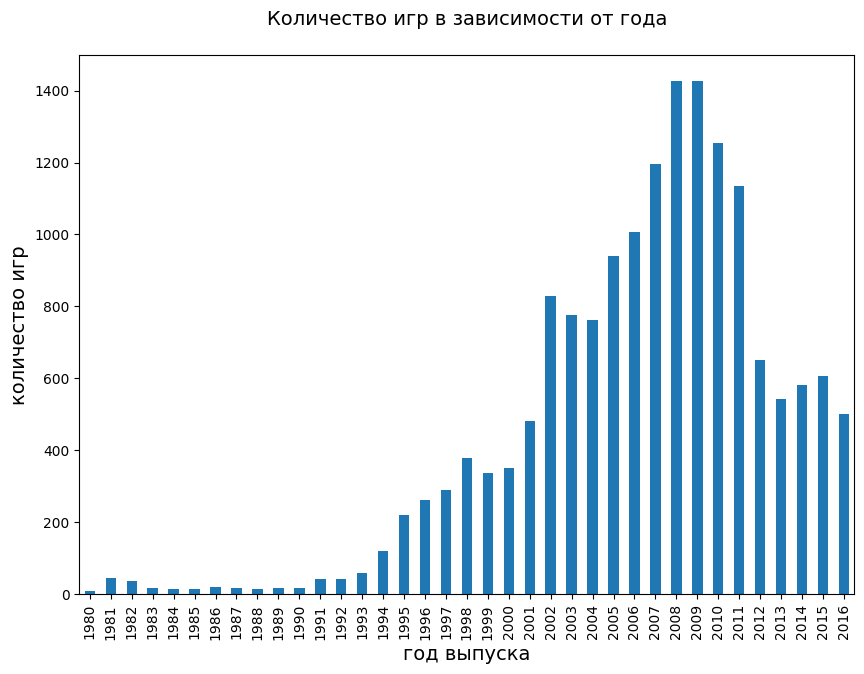

In [25]:
plt.figure(figsize=(10,7))
data.groupby(by='year_of_release')['year_of_release'].count().plot(kind='bar')
plt.title("Количество игр в зависимости от года\n", fontsize=14)
plt.xlabel("год выпуска", fontsize=14)
plt.ylabel("количество игр", fontsize=14);

По графику видно, что с 1980 по 1993 выпускалось мало игр (меньше 50 в год), затем начался рост, в 2008-2009 годах был максимум - больше 1400 игр в год, затем количество выпускаемых игр стало снижаться, однако держится в среднем на уровне 500-600 наименований.

Вычислим количество игр, выпущенных до 1994 года.

In [26]:
len(data[data['year_of_release'] < 1994])

365

По сравнению с общим количеством игр в наших данных (больше 16 тысяч) 365 - незначительное количество.

Построим график распределения количества продаж по платформам.

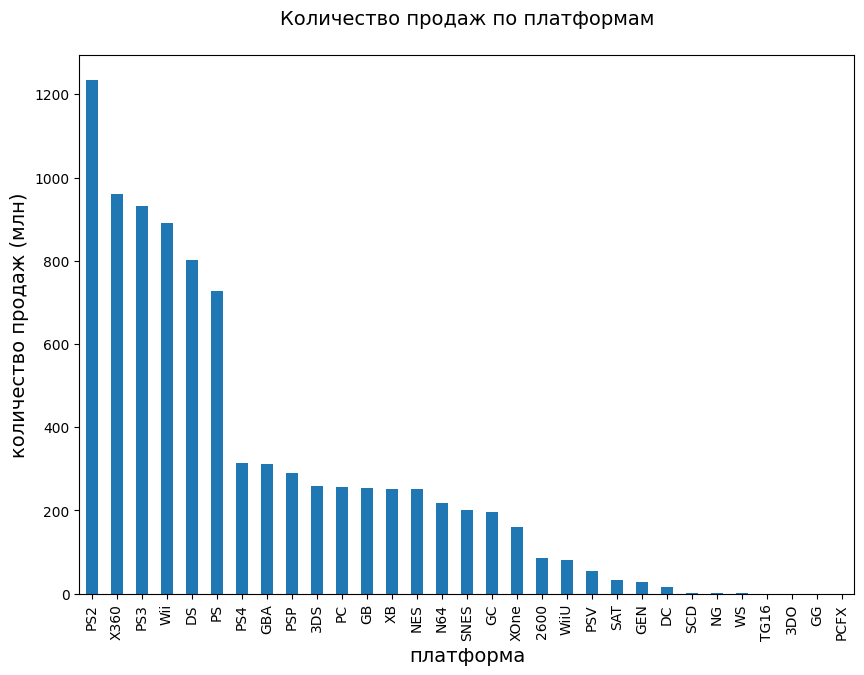

In [27]:
plt.figure(figsize=(10,7))
data.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Количество продаж по платформам\n", fontsize=14)
plt.xlabel("платформа", fontsize=14)
plt.ylabel("количество продаж (млн)", fontsize=14);

Выберем явных лидеров - PS2, X360, PS3, Wii, DS, PS. Построим для каждой платформы график распределения количества продаж по годам. Для этого создадим функцию, которая на входе будет принимать название платформы, а на выходе строить нужный нам график.

In [28]:
# Функция для построения графика распределения количества продаж по годам
def fig_platform (name):
    plt.figure(figsize=(10,7))
    plt.title("Продажи по годам " + name, fontsize=14)
    (data[data['platform'] == name].groupby(by='year_of_release')['total_sales'].sum().plot(kind='bar')
     .set(xlabel='год', ylabel='количество продаж (млн)'))
    return

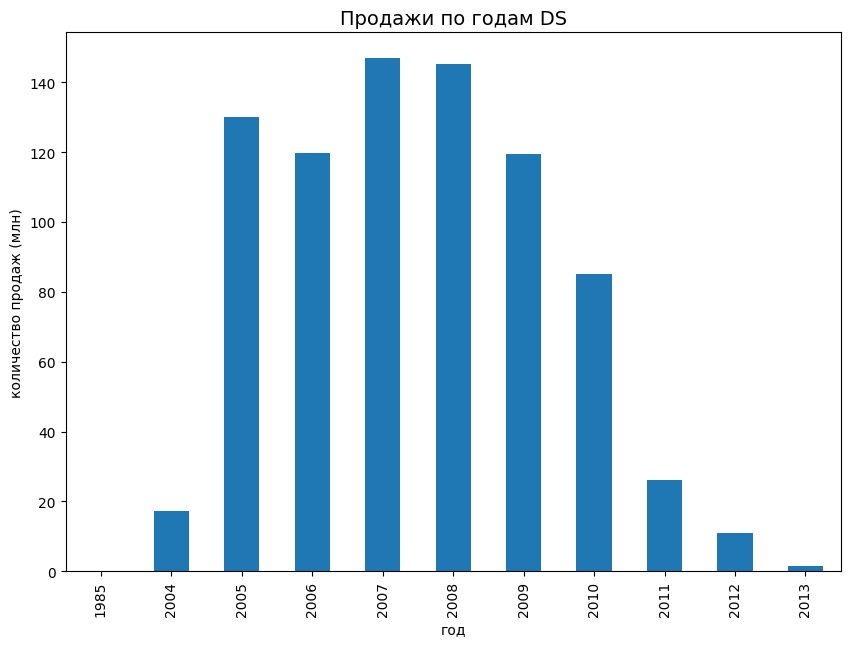

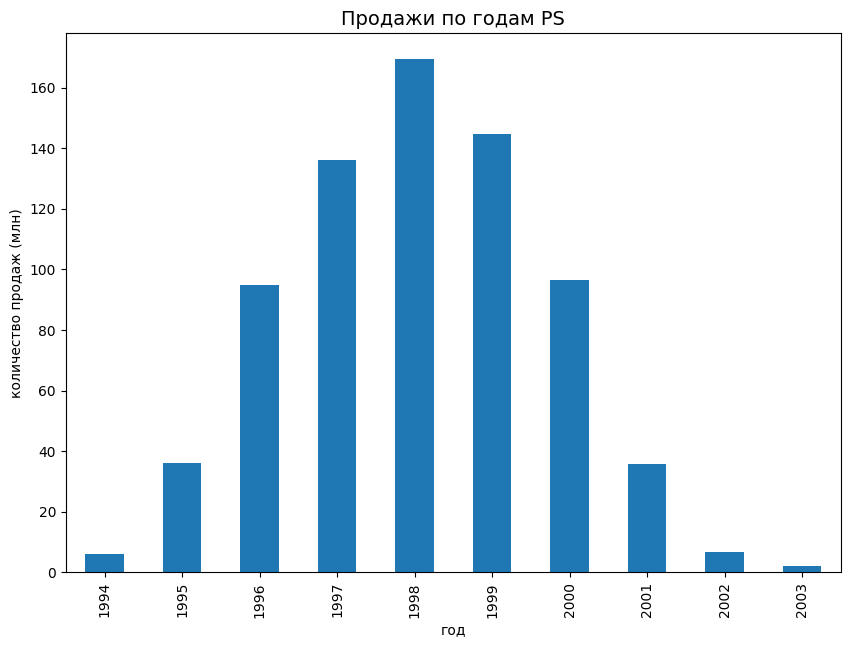

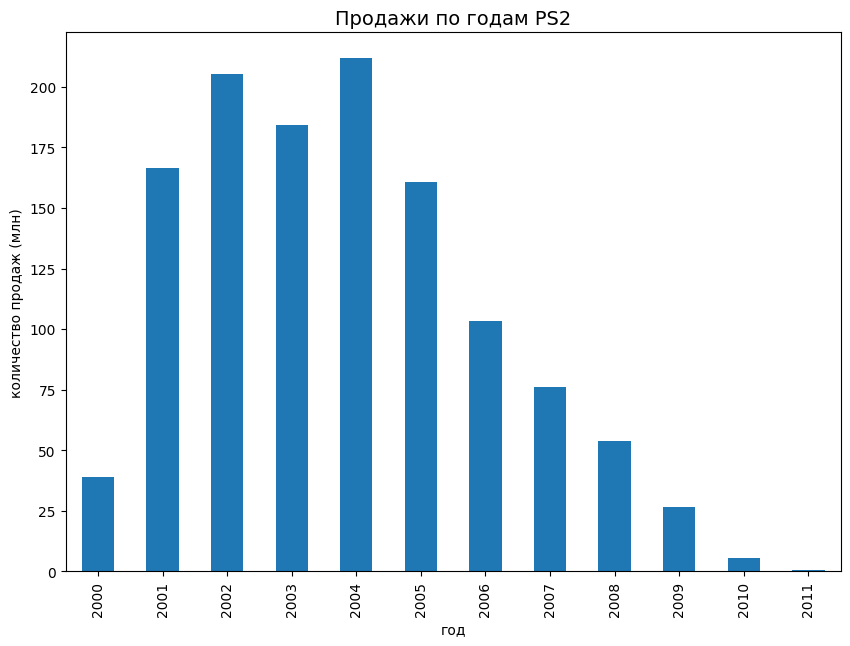

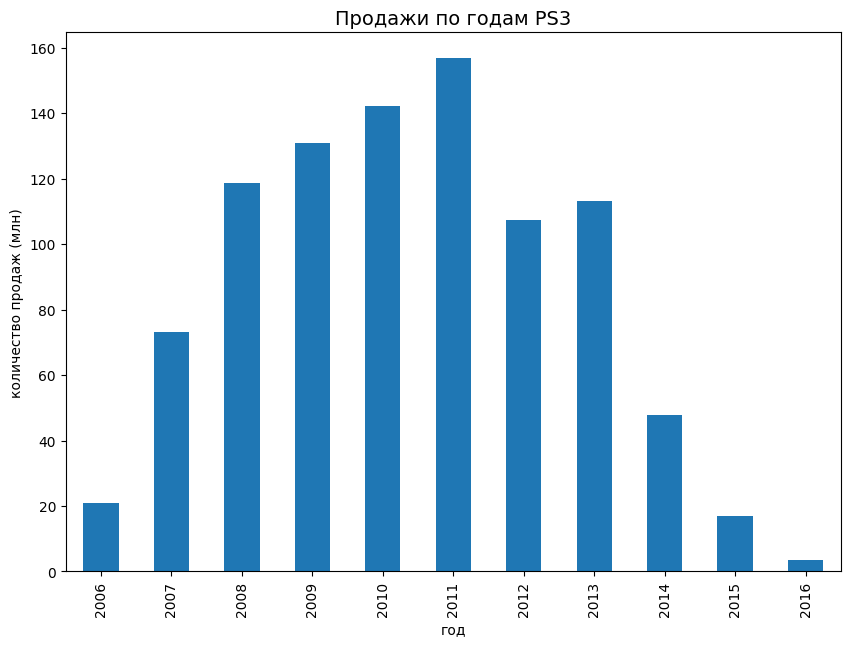

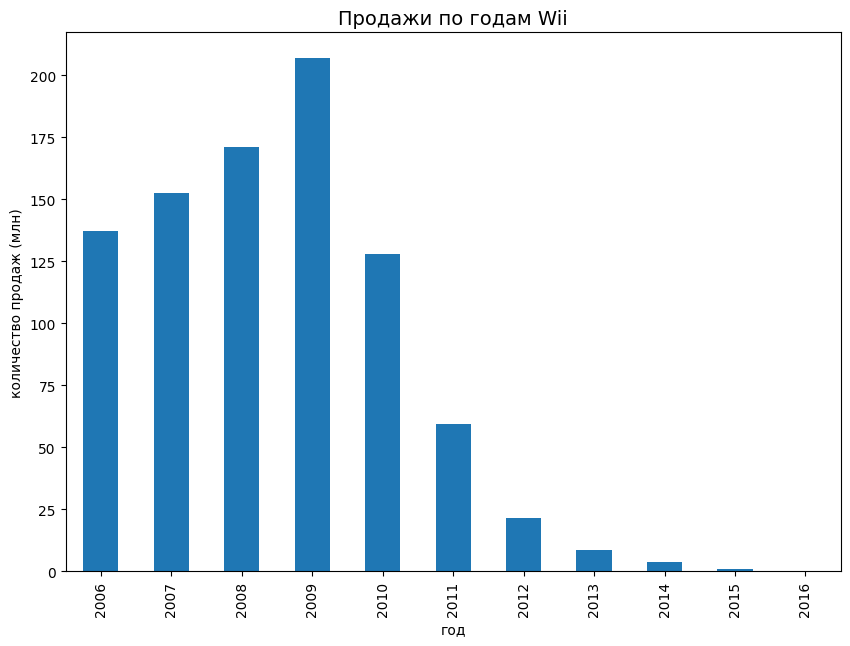

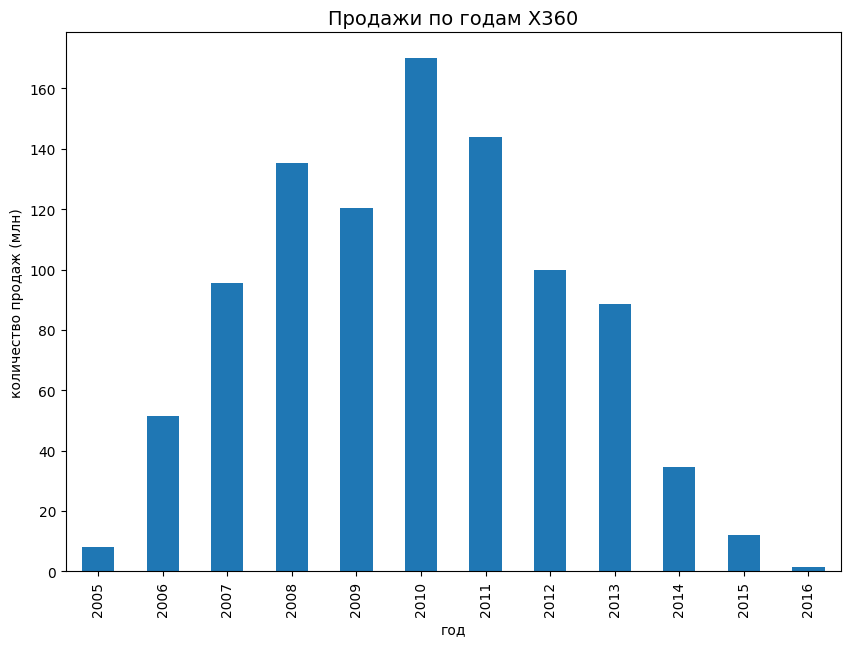

In [29]:
# Создадим список платформ, для которых будем строить графики (это выбранные нами лидеры продаж)
list_platform = ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']

# Построим графики для каждой платформы из списка
for item in list_platform:
    fig_platform(item)

На графике продаж платформы DS видим данные за 1985 год, однако платформа была создана в 2004 году. Отсортируем данные для платвормы DS по году релиза и посмотрим, что это за игра и есть ли в наших данных еще игры раньше 2004 года.

In [30]:
data[data['platform'] == 'DS'].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NoRating,0.02
13463,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.00,NaN,NaN,E,0.04
11517,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.00,NaN,NaN,NoRating,0.08
4421,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.00,NaN,NaN,NoRating,0.43
7902,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.00,NaN,NaN,NoRating,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...
7460,Disney's Planes,DS,2013,Simulation,0.11,0.08,0.00,0.02,NaN,NaN,E,0.21
14716,LEGO Legends of Chima: Laval's Journey,DS,2013,Adventure,0.00,0.03,0.00,0.00,NaN,NaN,E10+,0.03
7993,The Smurfs 2,DS,2013,Platform,0.00,0.17,0.00,0.01,NaN,NaN,E,0.18
3862,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NoRating,0.51


Видим, что за 1985 год одна игра - Strongest Tokyo University Shogi DS, у остальных год релиза 2004 и позже. По данным в интернете можно уточить, что игра Strongest Tokyo University Shogi вышла в 2004 году. Исправим год в наших данных.

In [31]:
# Проверим, что у нас одна игра с таким названием
data[data['name'] == 'Strongest Tokyo University Shogi DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NoRating,0.02


In [32]:
# Внесем исправления
data.loc[15957, 'year_of_release'] = 2004

In [33]:
# Проверим, что исправления внесены
data[data['name'] == 'Strongest Tokyo University Shogi DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,2004,Action,0.0,0.0,0.02,0.0,NaN,NaN,NoRating,0.02


По остальным платформам данные верные. Таким образом по нашим графикам можно сделать следущие выводы:

DC существовала с 2004 по 2013, 9 лет, максимум количества продаж был в 2007 году - больше 140 млн копий;

PS существовала с 1994 по 2003, 9 лет, максимум количества продаж был в 1998 году - больше 160 млн копий;

PS2 существовала с 2000 по 2011, 11 лет, максимум количества продаж был в 2004 году - больше 200 млн копий;

PS3 существовала с 2006 по 2016, 10 лет, максимум количества продаж был в 2011 году - около 160 млн копий;

Wii существовала с 2006 по 2016, 10 лет, максимум количества продаж был в 2009 году - больше 200 млн копий;

X360 существовала с 2005 по 2016, 11 лет, максимум количества продаж был в 2010 году - больше 160 млн копий.

**Вывод:** проанализировали имеющиеся у нас данные. Во-первых, можно не рассматривать данные до 1994 года, так как в тот период выпускалось очень мало игр. Во-вторых, поскольку мы делаем анализ для планирования кампании на следующий (2017) год, нам важны нестарые данные, чтобы мы могли отследить последние тенденции в сфере продаж игр. Вряд ли имеет смысл брать данные старше 10 лет - по графику количества игр по годам мы видим, что, например, в период с 2002 по 2012 был и резкий рост продаж почти в 2 раза, и затем заметное падение, то есть данные меняются достаточно быстро. В-третьих, анализ платформ - лидеров продаж показал, что платформы живут в среднем 9-10 лет и пик продаж приходится примерно на половину этого срока.

Учитывая все три пункта, а так же то, что на графике количества игр по годам видим, что в 2012 году игр было выпущено почти в 2 раза меньше, чем в 2011, и далее с 2012 по 2016 количество игр меняется не очень сильно, выберем для анализа период с 2012 по 2016 годы.

#### Анализ данных за актуальный период

Мы определили актуальный период - с 2012 по 2016 года. Создадим новый датафрейм, который будет содержать данные только за этот период, и проанализируем его.

In [34]:
data_new = data[data['year_of_release'] > 2011]

data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   int32  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           2885 non-null   object 
 11  total_sales      2885 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 281.7+ KB


In [35]:
data_new['year_of_release'].unique()

array([2013, 2015, 2012, 2014, 2016])

Осталось 2886 строк. Так же проверили, что у нас, действительно, данные только за нужные годы.

##### Исследование лидеров продаж

Исследуем, какие платформы лидируют по продажам и какие представляют интерес, как потенциально прибыльные.

In [36]:
# Сгруппируем по наименованию платформы и посчитаем суммарные продажи за все года
data_new.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.78
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

В лидерах PS4, PS3, X360, 3DS и XOne. Однако, как мы помним из предыдущего анализа, у любой платформы есть максимум продаж - возможно, на наши данные о лидерах повлиял он. Построим график, на котором будут изображены продажи каждой платформы по годам, и посмотрим, растут продажи или падают.

In [37]:
# Создадим сводную таблицу, на основе которой будем строить график
pivot = data_new.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

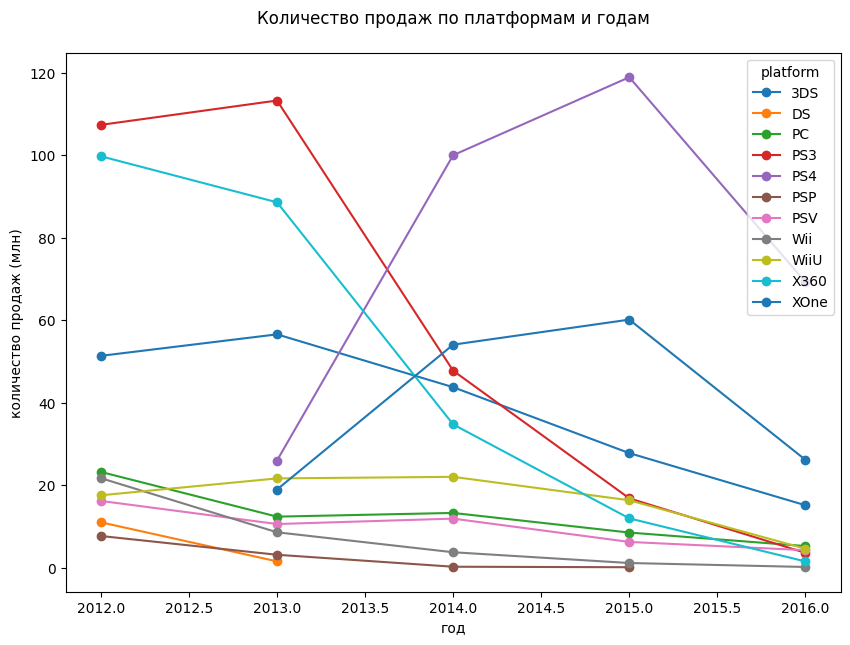

In [38]:
# Построим график
pivot.plot(marker='o', figsize=(10,7), xlabel='год'
           , ylabel='количество продаж (млн)', title='Количество продаж по платформам и годам\n');

По графику видим, что продажи в целом падают у всех платформ. PS3 и X360 упали сильно. Мы рассматривали их в прошлом разделе и видели, что время жизни этих платформ заканчивается. Поэтому не будем их считать перспективными, не смотря на большое количество продаж.

Из потенциально прибыльных можно выбрать PS4 и XOne - новые платформы, существуют 3 года, продажи самые высокие, не смотря на общий спад. 3DS и WiiU тоже выглядят перспективно, WiiU даже немного росла, хотя в 2016 году снова упала. Эти платформы появились в 2011 году, то есть сейчас они уже существуют 5 лет и, вероятно, прошли свой пик количества продаж. Однако продажи все еще велики относительно других платформ.

##### Боксплот по продажам для платформ

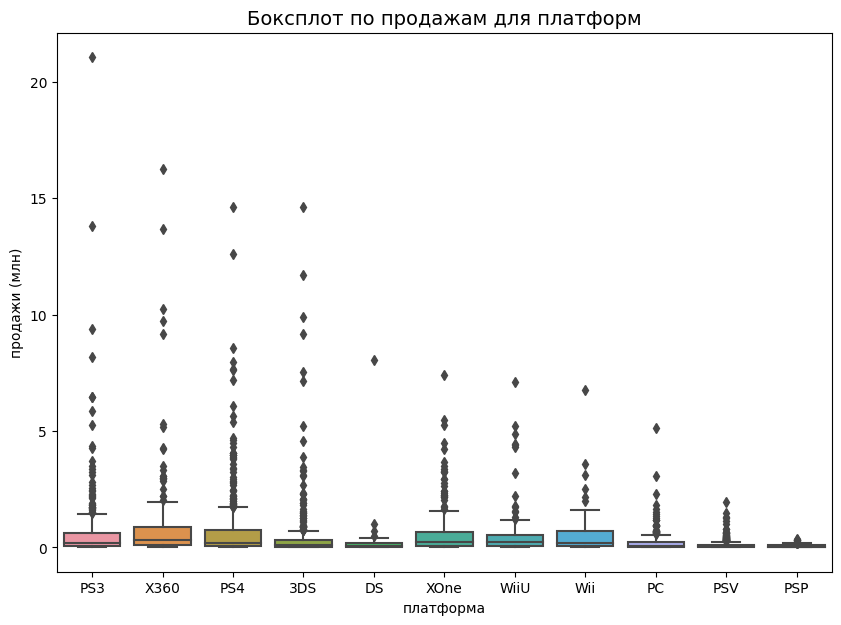

In [67]:
plt.figure(figsize=(10,7))
plt.title("Боксплот по продажам для платформ", fontsize=14)
seaborn.boxplot(data=data_new, x='platform', y='total_sales').set(xlabel='платформа', ylabel='продажи (млн)');

Видим, что у платформ X360, PS4 и 3DS максимум продаж в районе 15 млн, а у PS3 больше 20 млн.

Рассмотрим график с масштабированием данных - ограничим ось Y 2 млн.

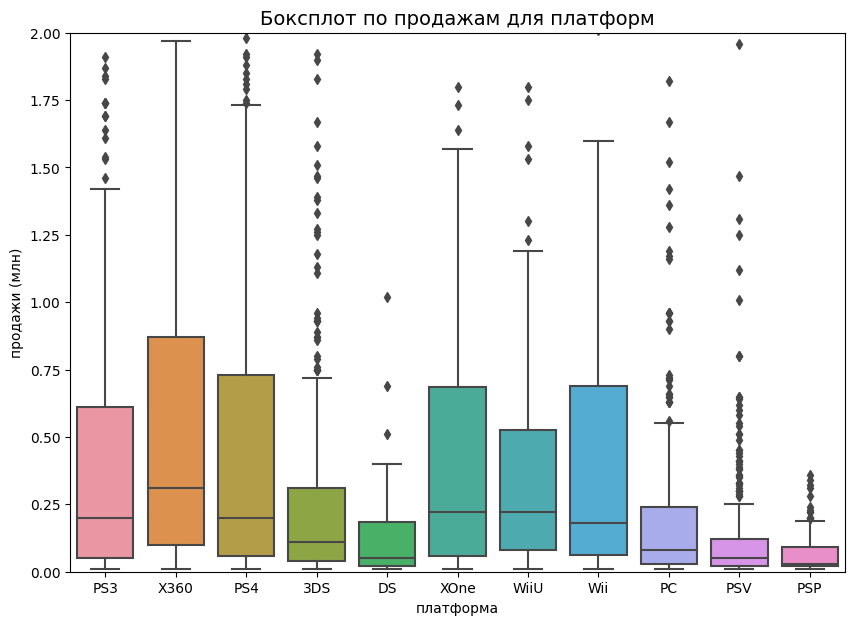

In [70]:
plt.figure(figsize=(10,7))
plt.title("Боксплот по продажам для платформ", fontsize=14)
plt.ylim(0,2)
seaborn.boxplot(data=data_new, x='platform', y='total_sales').set(xlabel='платформа', ylabel='продажи (млн)');

Видим, что у платформ X360, XOne, WiiU, Wii, PS3 и PS4 медианы продаж больше медиан других платформ, что говорит о стабильно высоких продажах.

##### Исследование влияния на продажи оценок пользователей и критиков

Создадим функцию, которая на входе будет принимать название платформы, а на выходе строить диаграммы рассеяния и вычислять коэффициент корреляции для оценок критиков и пользователей  - и суммарных продаж.

In [45]:
def fig_correlation (name):
    data_platform = data_new[data_new['platform'] == name]
    
    data_platform.plot(x='critic_score', y='total_sales'
                                                 , kind='scatter', alpha=0.4, figsize=(10,7));
    plt.title("Зависимость суммарных продаж от оценок критиков\n платформа " + name, fontsize=14)
    plt.xlabel("оценки критиков", fontsize=14)
    plt.ylabel("суммарные продаж (млн)", fontsize=14)
    plt.show()
    
    print('Коэффициент корреляции для оценки критиков и суммарных продаж для ' + name + ':'
          , data_platform['critic_score'].corr(data_platform['total_sales']))
    
    print('-'*90)
    
    data_platform.plot(x='user_score', y='total_sales'
                                                 , kind='scatter', alpha=0.4, figsize=(10,7));
    plt.title("Зависимость суммарных продаж от оценки пользователей\n платформа " + name, fontsize=14)
    plt.xlabel("оценки пользователей", fontsize=14)
    plt.ylabel("суммарные продажи (млн)", fontsize=14)
    plt.show()
    
    print('Коэффициент корреляции для оценки пользователей и суммарных продаж для ' + name + ':'
          , data_platform['user_score'].corr(data_platform['total_sales']))
    return

Рассмотрим самую популярную платформу PS4.

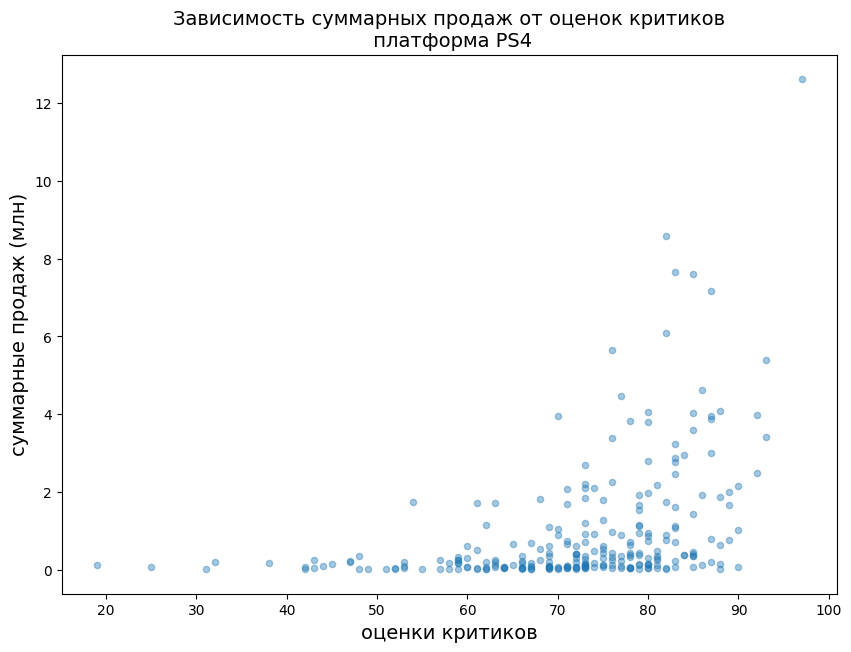

Коэффициент корреляции для оценки критиков и суммарных продаж для PS4: 0.4065679020617813
------------------------------------------------------------------------------------------


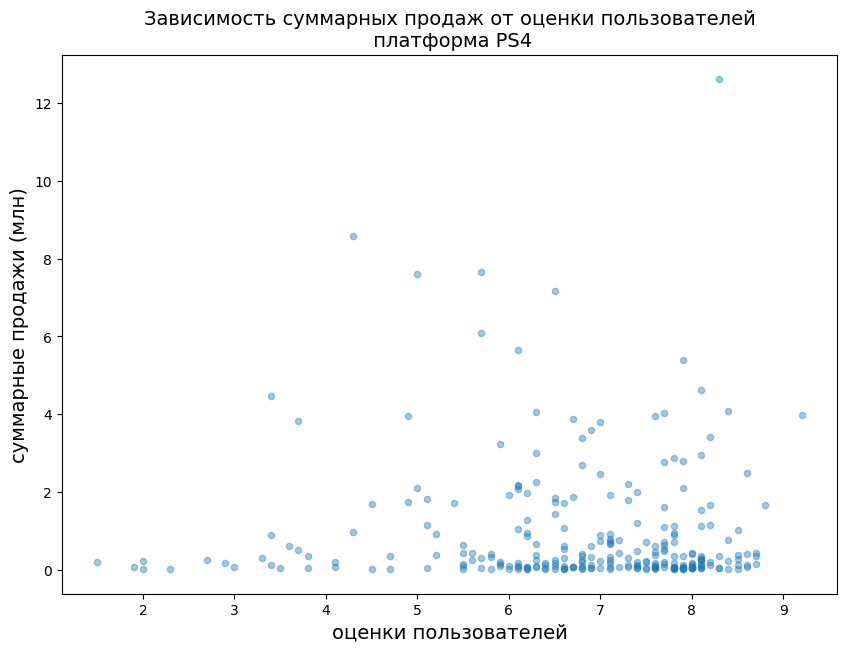

Коэффициент корреляции для оценки пользователей и суммарных продаж для PS4: -0.031957110204556466


In [46]:
fig_correlation('PS4')

По графикам и коэффициентам корреляции видим, что существует слабая связь между оценками критиков и продажами - чем выше оценка, тем выше продажи. Связи между оценками пользователей и продажами нет, оценки пользователей на продажи не влияют.

Рассмотрим другие платформы.

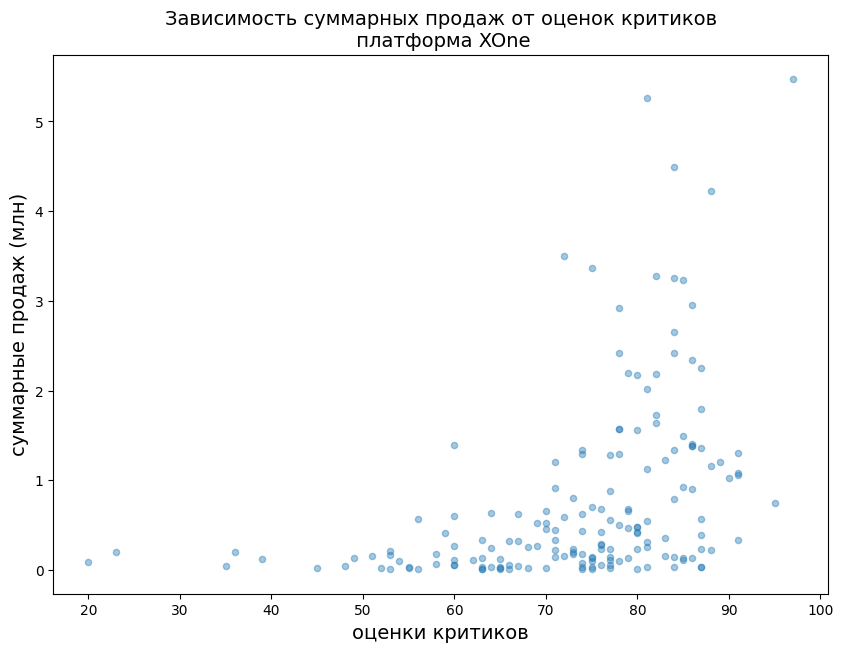

Коэффициент корреляции для оценки критиков и суммарных продаж для XOne: 0.41699832800840153
------------------------------------------------------------------------------------------


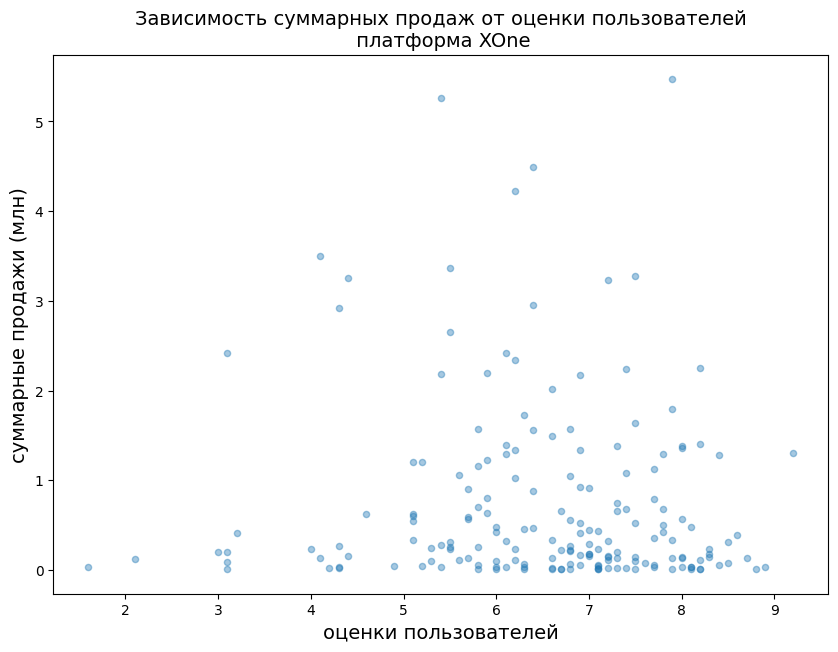

Коэффициент корреляции для оценки пользователей и суммарных продаж для XOne: -0.0689250532827942


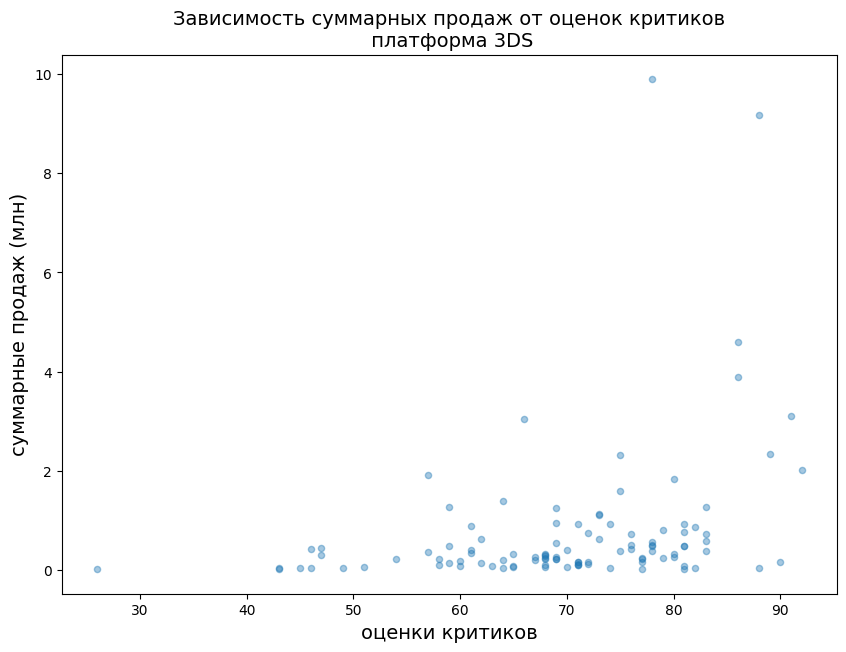

Коэффициент корреляции для оценки критиков и суммарных продаж для 3DS: 0.32080286953607867
------------------------------------------------------------------------------------------


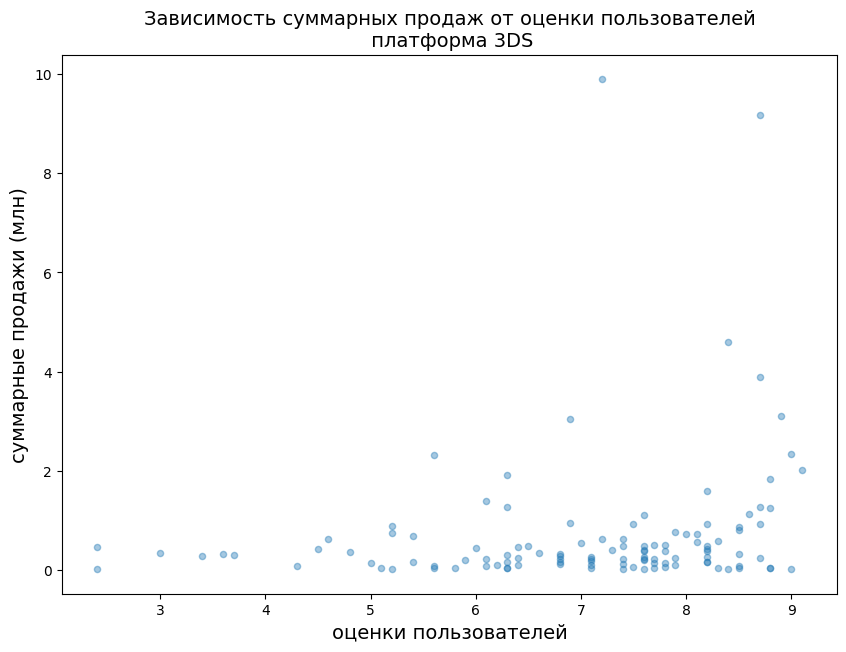

Коэффициент корреляции для оценки пользователей и суммарных продаж для 3DS: 0.197582634110386


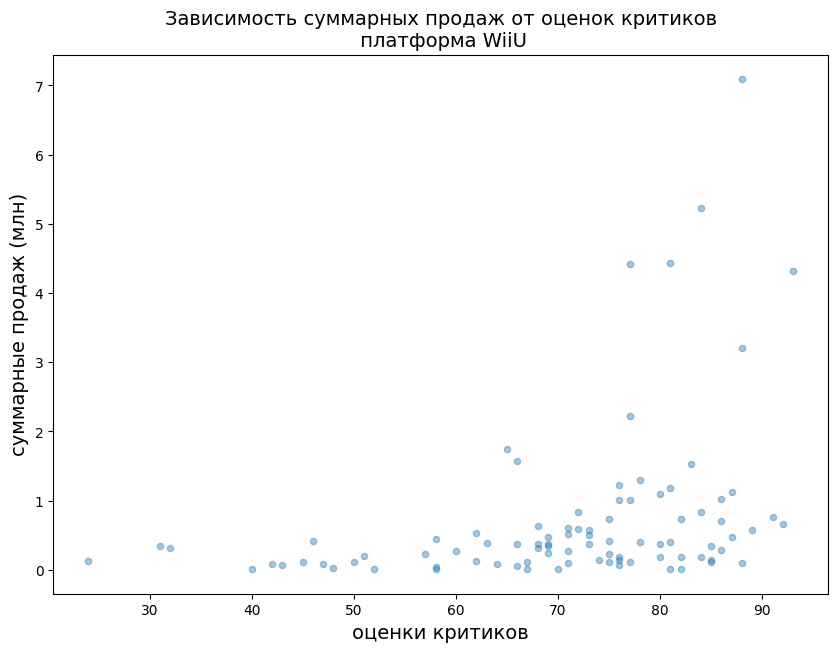

Коэффициент корреляции для оценки критиков и суммарных продаж для WiiU: 0.34837976012017474
------------------------------------------------------------------------------------------


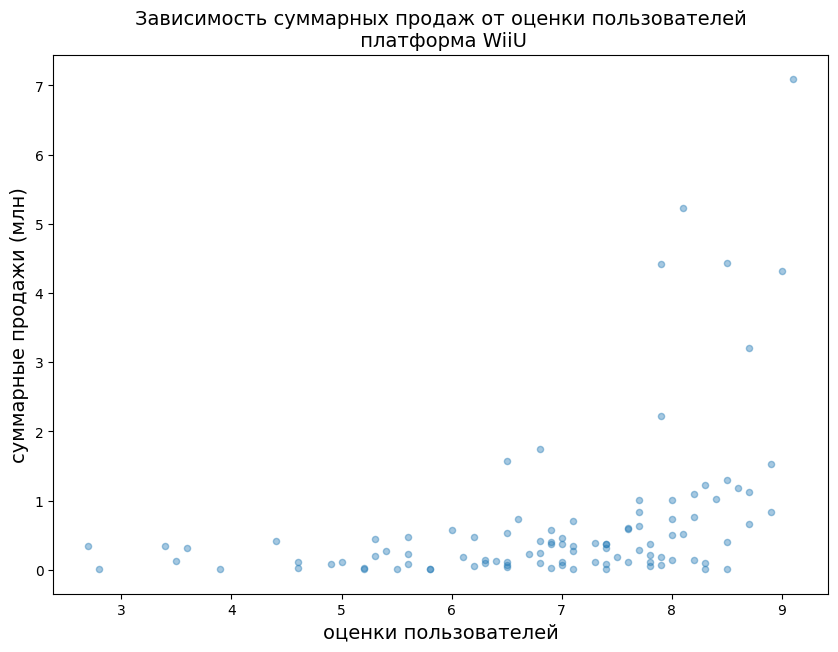

Коэффициент корреляции для оценки пользователей и суммарных продаж для WiiU: 0.40021902021486144


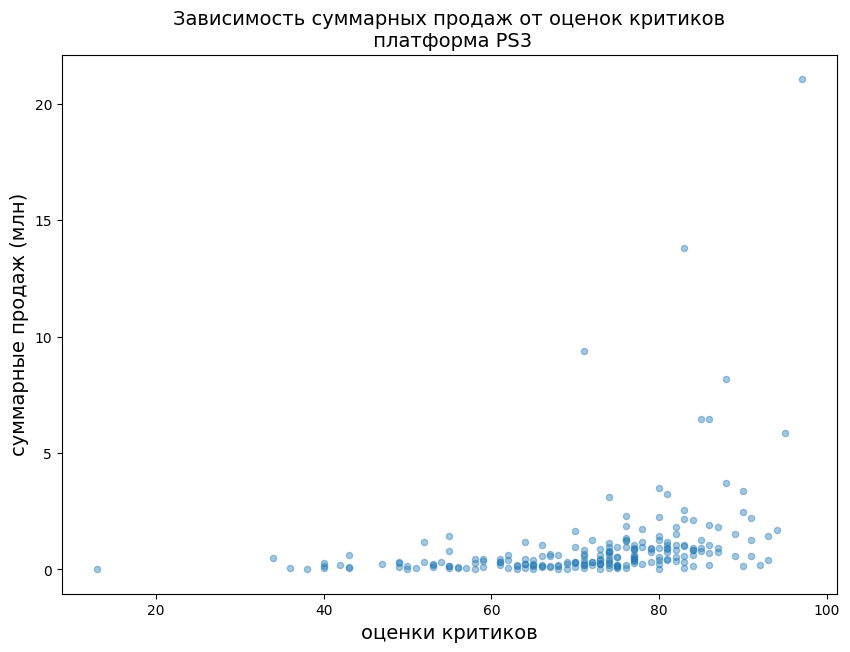

Коэффициент корреляции для оценки критиков и суммарных продаж для PS3: 0.3341517575509854
------------------------------------------------------------------------------------------


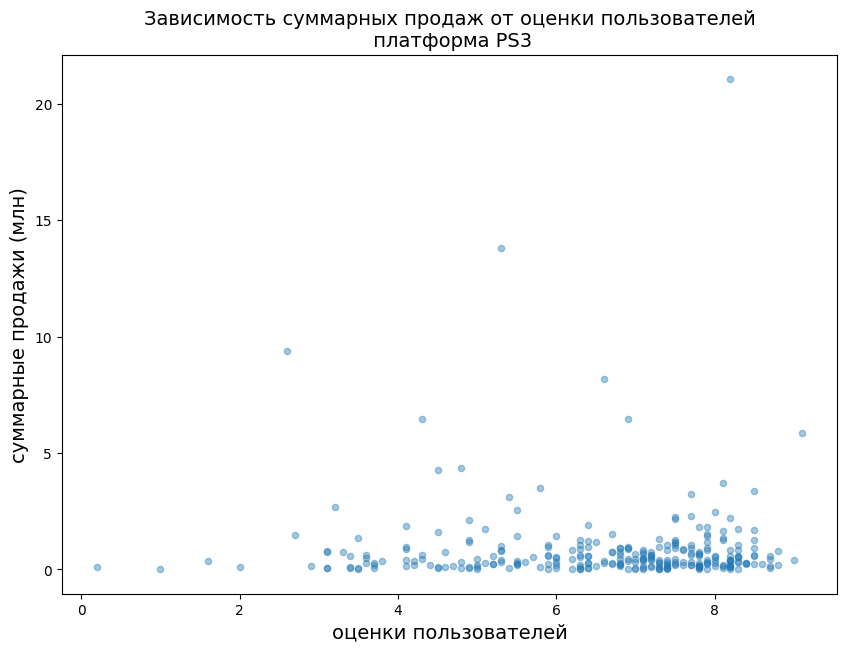

Коэффициент корреляции для оценки пользователей и суммарных продаж для PS3: -0.006205767686051528


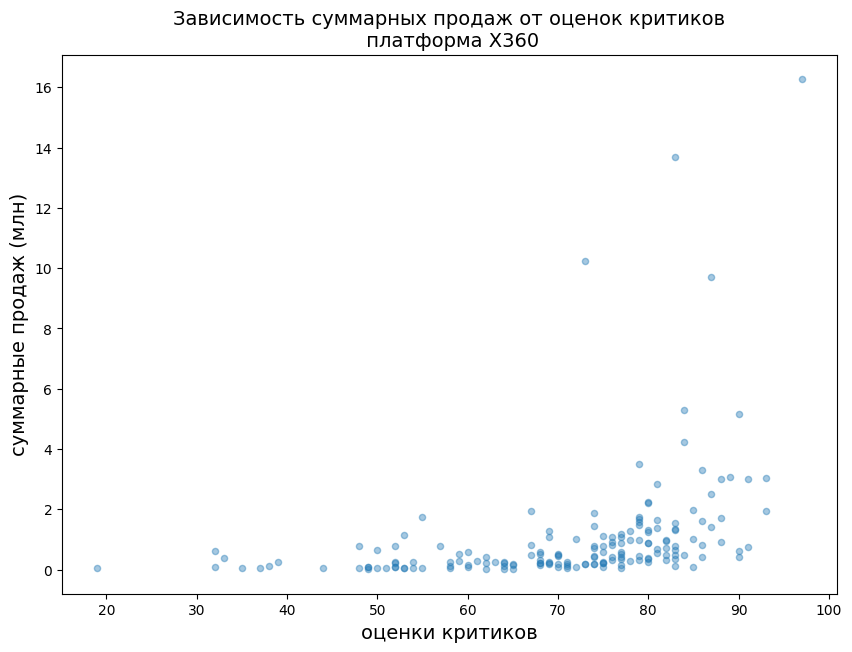

Коэффициент корреляции для оценки критиков и суммарных продаж для X360: 0.36057348885073387
------------------------------------------------------------------------------------------


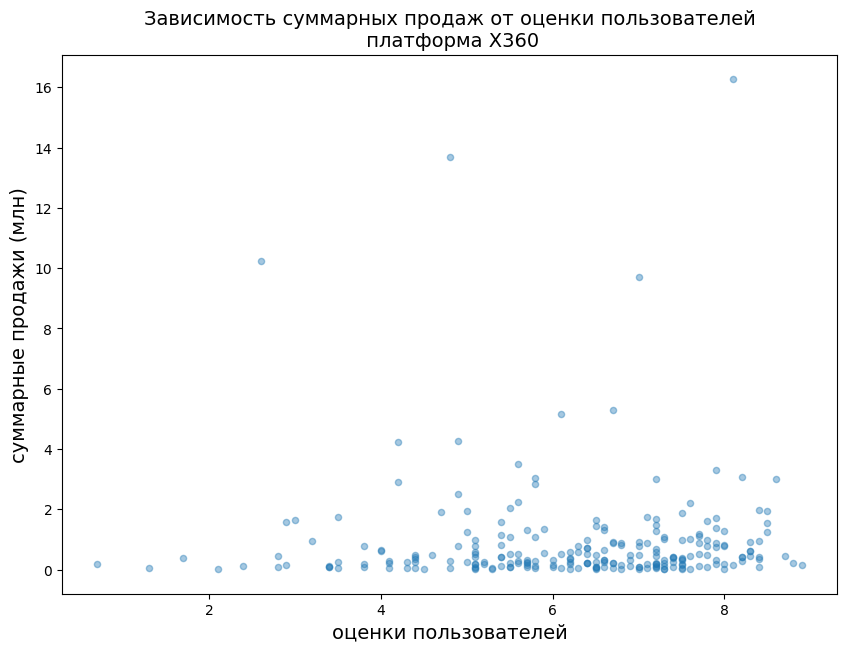

Коэффициент корреляции для оценки пользователей и суммарных продаж для X360: 0.006163978646213367


In [47]:
# Создадим список платформ, для которых будем строить графики
list_platform_new = ['XOne', '3DS', 'WiiU', 'PS3', 'X360']

# Построим графики для каждой платформы из списка
for item in list_platform_new:
    fig_correlation(item)
    print('='*90)

По получившимся графикам и коэффициентам корреляции видим, что для всех выбранных платформ характерна слабая связь между оценками критиков и продажами - коэффициент корреляции от 0.3 до 0.4. Корреляция между оценками пользователей и продажами получилась разная. Для XOne, PS3 и X360 она близка к нулю. Это платформы Microsoft и Sony. У PS4, которую мы рассматривали первой, тоже коэффициент корреляции близок к нулю. В тоже время для 3DS и WiiU Nintendo коэффициент корреляции 0.2-0.4, то есть связь между оценками пользователей и продажами есть, хоть и слабая.

Таким образом можно сделать вывод, что прямая зависимость между оценками критиков и продажами существует для всех компаний, хоть и слабая, в то время как зависимость между оценками пользователей и продажами существует не для всех компаний.

##### Исследование распределения игр по жанрам

In [71]:
# Сравним медианные значения продаж по жанрам
data_new.groupby(by='genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.440
Sports          0.240
Platform        0.210
Role-Playing    0.140
Racing          0.140
Fighting        0.130
Simulation      0.120
Misc            0.120
Action          0.120
Strategy        0.080
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

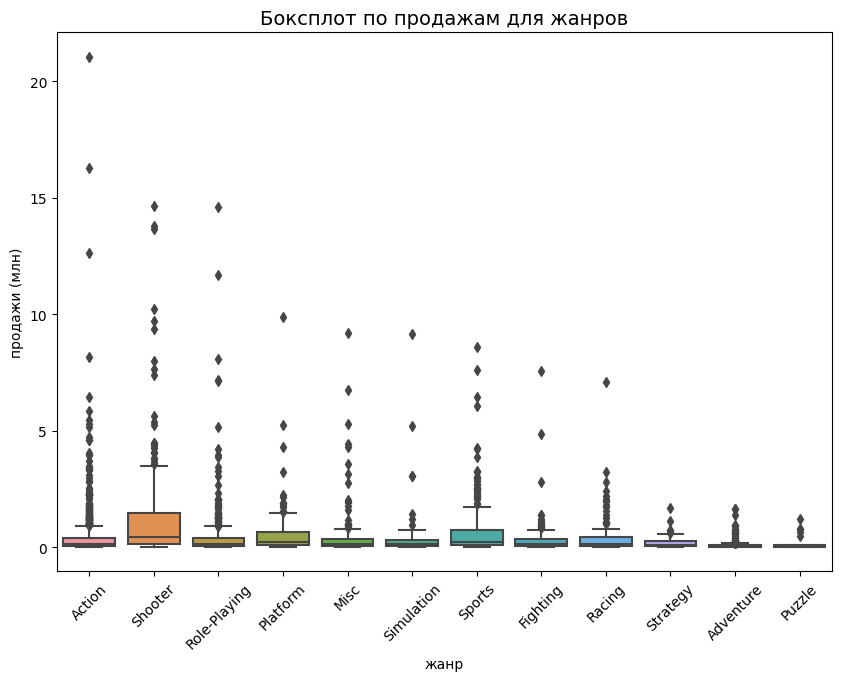

In [50]:
# Построим график
plt.figure(figsize=(10,7))
seaborn.boxplot(data=data_new, x='genre', y='total_sales').set(xlabel='жанр', ylabel='продажи (млн)');
plt.title("Боксплот по продажам для жанров", fontsize=14)
plt.xticks(rotation=45)
plt.show()

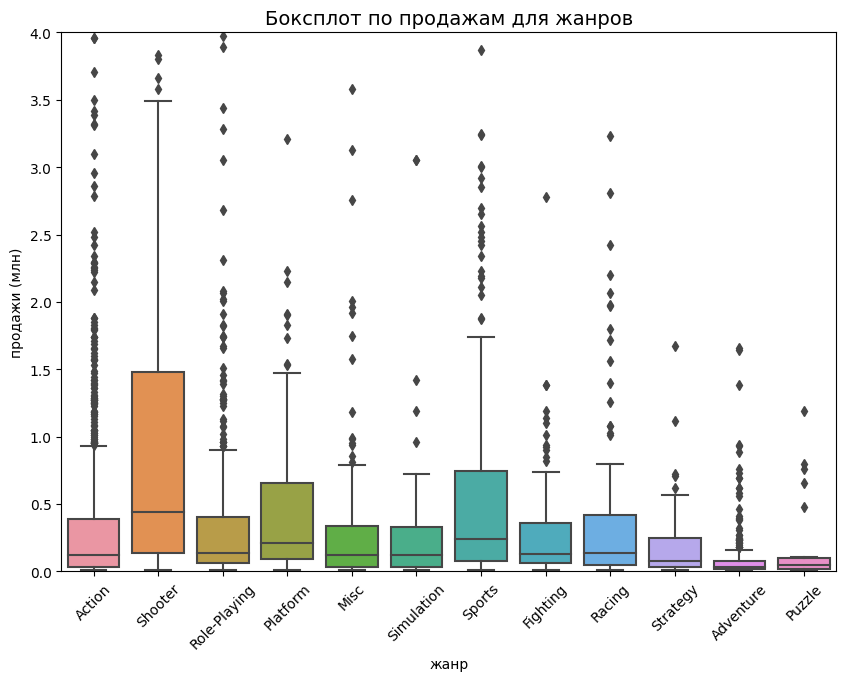

In [51]:
plt.figure(figsize=(10,7))
seaborn.boxplot(data=data_new, x='genre', y='total_sales').set(xlabel='жанр', ylabel='продажи (млн)');
plt.title("Боксплот по продажам для жанров", fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0,4)
plt.show()

Больше всего продаж игр жанра Shooter, затем идут Sports и Platform. Меньше всего продаж у жанра Adventure. Shooter имеет почти в два раза большее медианное значение продаж, чем Sports. Разница между остальными жанрами не так заметна.

**Общий вывод:** проанализировали имеющиеся у нас данные и выбрали те, которые актуальны для нашего исследования - года с 2012 по 2016. В дальнейшем использовали для анализа только эти данные. Кроме того, выяснили, что платформы живут в среднем 9-10 лет и максимум продаж чаще всего имеют в середине этого срока.

Определили, что продажи в целом падают, но тем не менее лидерами рынка являются платформы PS4 и XOne, так же хорошие показатели у 3DS и WiiU. Указали, что эти платформы перспективны.

Построили боксплоты по суммарным продажам для каждой платформы. Выяснили, что у платформ X360, PS4 и 3DS максимум продаж в районе 15 млн, а у PS3 больше 20 млн. У платформ X360, XOne, WiiU, Wii, PS3 и PS4 медианы продаж больше медиан других платформ, что говорит о стабильно высоких продажах.

Проанализировали взаимосвязь оценок пользователей и критиков и продаж, выяснили, чем выше оценка критиков, тем больше проданных копий, хотя связь слабая. В то же время зависимость между оценками пользователей и продажами существует не для всех компаний. Для платформ Nintendo коэффициент корреляции 0.2-0.4 (зависимость слабая прямая), для платформ Microsoft и Sony близок к нулю (зависимости нет).

Изучили распределение игр по жанрам. Самые популярные жанры Shooter, Sports и Platform. Самый непопулярный - Adventure. Shooter имеет почти в два раза большее медианное значение продаж, чем Sports. Разница между остальными жанрами не так заметна.

### Портрет пользователя каждого региона

#### Популярные платформы

In [52]:
# Создадим функцию, которая на входе будет принимать следующие данные:
# Данные, характеристики которых хотим изучить (параметр column), продажи (quantity) и название региона (region)
# На выходе функция будет выводить таблицу, показывающую продажи по характеристике column
# Так же функция будет выводить круговую диаграмму, отражающую процентное соотношение продаж

def fig_sales (column, quantity, region):
    display(data_new.groupby([column])[quantity].sum().sort_values(ascending=False))
    
    if column == 'platform':
        title = "платформ"
    elif column == 'genre':
        title = "жанров"
    elif column == 'rating':
        title = "рейтингов"
    else:
        title = ""
    
    plt.figure(figsize=(12,8))
    plt.title("Соотношение " + title + " по продажам\n" + region, fontsize=14)
    data_new.groupby([column])[quantity].sum().sort_values(ascending=False).plot(kind='pie'
                                                                                 , autopct='%1.0f%%', ylabel='продажи');
    return

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
WiiU     38.10
PC       19.12
Wii      17.45
PSV      10.98
DS        4.59
PSP       0.13
Name: na_sales, dtype: float64

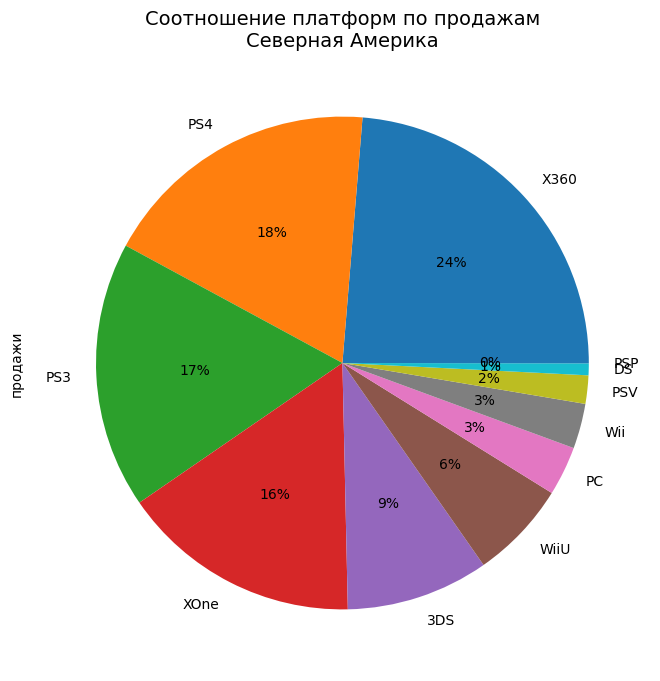

In [53]:
fig_sales('platform', 'na_sales', 'Северная Америка')

Топ-5 платформ в Северной Америке - X360 (140.05 млн копий, 24% от продаж всех платформ), PS4 (108.74 млн копий, 18%), PS3 (103.38 млн копий, 17%), XOne (93.12 млн копий, 16%) и 3DS (55.31 млн копий, 9%).

platform
PS4     141.09
PS3     106.85
X360     74.52
XOne     51.59
3DS      42.64
PC       37.76
WiiU     25.13
Wii      11.92
PSV      11.36
DS        3.53
PSP       0.42
Name: eu_sales, dtype: float64

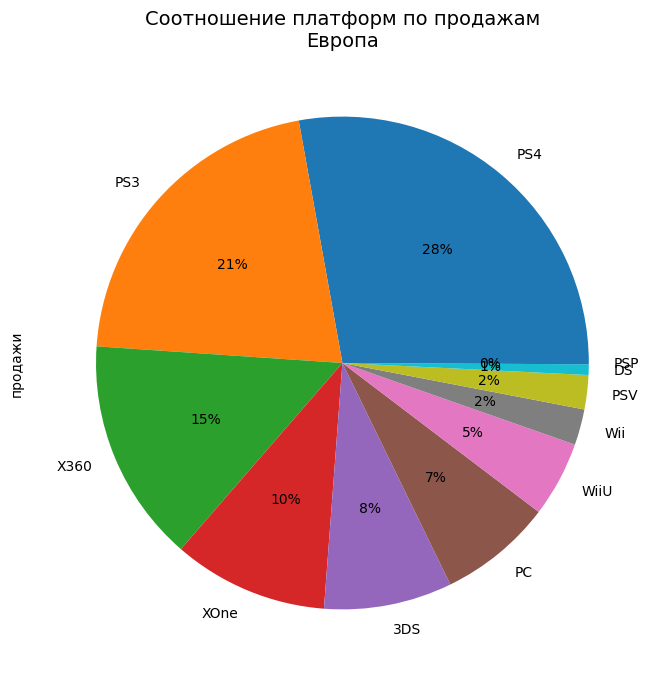

In [54]:
fig_sales('platform', 'eu_sales', 'Европа')

Топ-5 платформ в Европе - PS4 (141.09 млн копий, 28% от продаж всех платформ), PS3 (106.86 млн копий, 21%), X360 (74.52 млн копий, 15%), XOne (51.59 млн копий, 10%), 3DS (42.64 млн копий, 8%).

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
PSP     10.47
DS       3.72
Wii      3.39
X360     1.57
XOne     0.34
PC       0.00
Name: jp_sales, dtype: float64

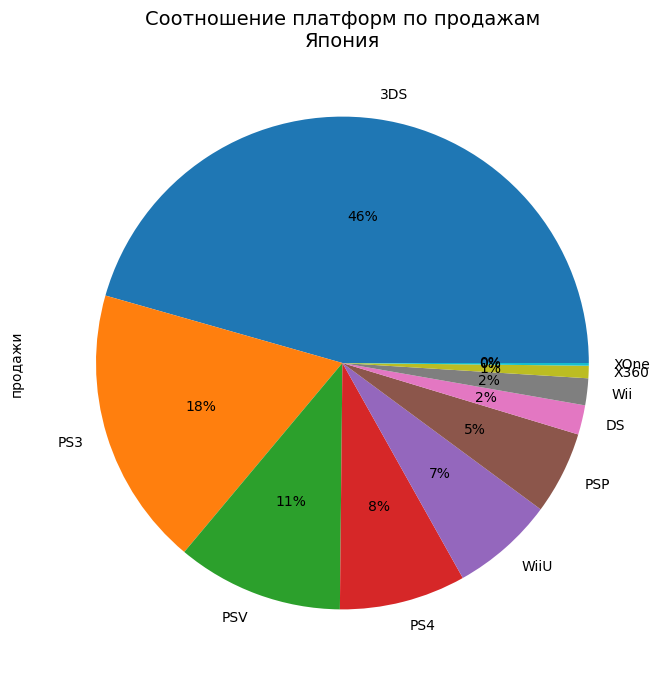

In [55]:
fig_sales('platform', 'jp_sales', 'Япония')

Топ-5 платформ в Европе - 3DS (87.79 млн копий, 46% от продаж всех платформ), PS3 (35.29 млн копий, 18%), PSV (21.04 млн копий, 11%), PS4 (15.96 млн копий, 8%), WiiU (13.01 млн копий, 7%).

По полученным графикам видим, что в Северной Америке самая популярная платформа X360 компании Microsoft, за ней идут PS4 и PS3 компании Sony, на четвертом месте XOne (преемница X360), на пятом месте портативная приставка 3DS компании Nintendo. В Европе популярны PS4 и PS3, за ними X360 и XOne, на пятом месте так же 3DS. В Японии же почти 50% продаж игр приходится на 3DS, затем идут PS3, PSV, PS4 компании Sony, и завершает топ-5 WiiU Nintendo. Получается, что в Японии топ-5 составляют платформы японских компаний, при чем почти 50% продаж приходится на портативную приставку 3DS. В Северной Америке лидируют платформы производтва Microsoft, а в Европе - Sony.

#### Популярные жанры

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Strategy          4.23
Puzzle            1.13
Name: na_sales, dtype: float64

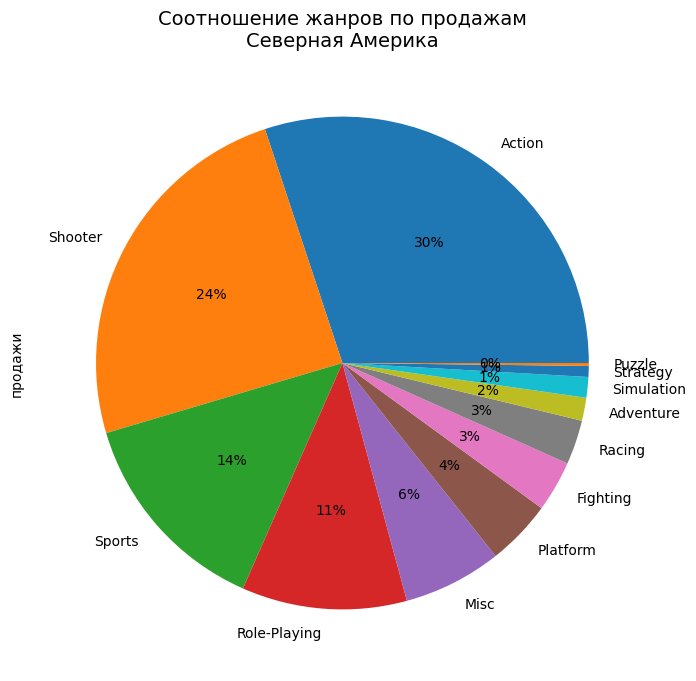

In [56]:
fig_sales('genre', 'na_sales', 'Северная Америка')

Топ-5 жанров в Северной Америке - Action (177.84 млн копий, 30% от продаж всех жанров), Shooter (144.77 млн копий, 24%), Sports (81.53 млн копий, 14%), Role-Playing (64.00 млн копий, 11%), Misc (38.19 млн копий, 6%).

genre
Action          159.34
Shooter         113.47
Sports           69.08
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40
Name: eu_sales, dtype: float64

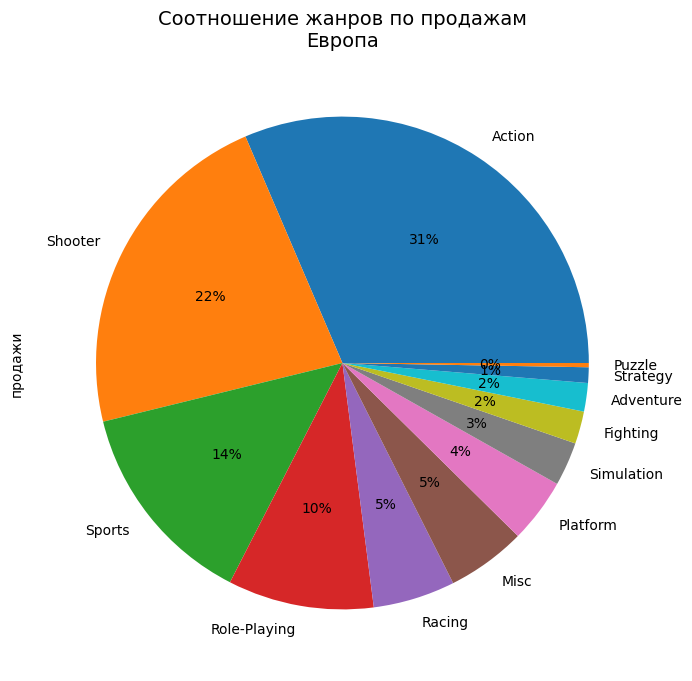

In [57]:
fig_sales('genre', 'eu_sales', 'Европа')

Топ-5 жанров в Европе - Action (159.34 млн копий, 31% от продаж всех жанров), Shooter (113.47 млн копий, 22%), Sports (69.09 млн копий, 14%), Role-Playing (48.53 млн копий, 10%), Racing (27.29 млн копий, 10%).

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Shooter          9.23
Platform         8.63
Adventure        8.24
Sports           8.01
Strategy         2.88
Racing           2.50
Puzzle           2.14
Name: jp_sales, dtype: float64

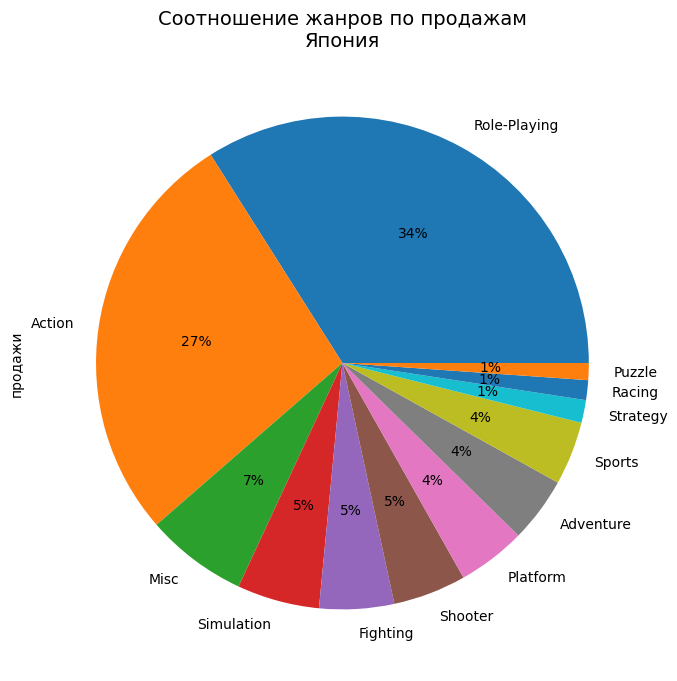

In [58]:
fig_sales('genre', 'jp_sales', 'Япония')

Топ-5 жанров в Японии - Role-Playing (65.44 млн копий, 34% от продаж всех жанров), Action (52.80 млн копий, 27%), Misc (12.86 млн копий, 7%), Simulation (10.41 млн копий, 5%), Fighting (9.44 млн копий, 5%).

Графики показывают, что в Северной Америке и Европе вкусы пользователей практически совпадают - на первых четырех местах в топ-5 расположены одинаковые жанры и в том же порядке, при чем и процентное соотношение продаж примерно совпадает. Разница только в пятом месте, в Северной Америке это Misc, а в Европе Racing. Вкусы жителей Японии отличаются кардинально. На первом месте в Японии Role-Playing, а Action только на втором, в отличие от Северной Америки и Европы, где Action на первом. В то же время в топ-5 Японии вообще не попали Shooter, Sports, Racing, но зато в топ-5 есть Simulation и Fighting, на четвертом и пятом местах соответственно.

#### Рейтинг ESRB

rating
M           231.57
E           114.37
NoRating    103.31
E10+         75.70
T            66.02
Name: na_sales, dtype: float64

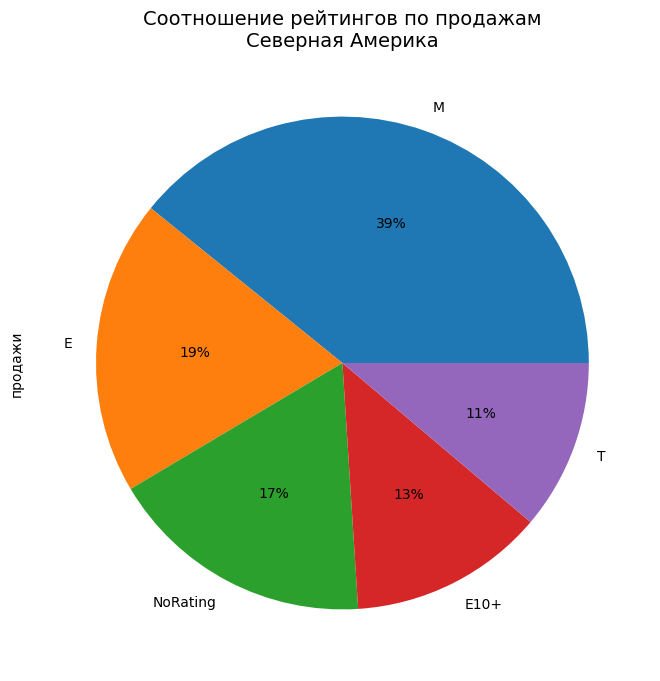

In [59]:
fig_sales('rating', 'na_sales', 'Северная Америка')

В Северной Америке на первом месте по продажам игры рейтинга M (231.57 млн копий, 39% от всего числа продаж), затем E (114.37 млн копий, 19%), NoRating (103.31 млн копий, 17%), E10+ (75.70 млн копий, 13%) и T (66.02 млн копий, 11%).

M - для лиц старше 17 лет, E - для всех возрастных категорий, E10+ - для лиц старше 10 лет, T - для лиц старше 13 лет.

rating
M           193.96
E           113.02
NoRating     91.50
E10+         55.37
T            52.96
Name: eu_sales, dtype: float64

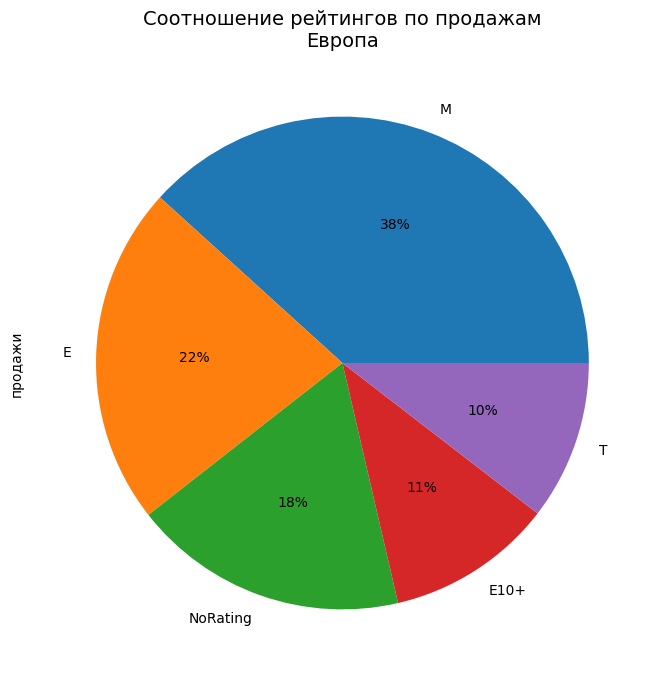

In [60]:
fig_sales('rating', 'eu_sales', 'Европа')

В Европе на первом месте по продажам игры рейтинга M (193.96 млн копий, 38% от всего числа продаж), затем E (113.02 млн копий, 22%), NoRating (91,50 млн копий, 18%), E10+ (55.37 млн копий, 11%) и T (52.96 млн копий, 10%).

rating
NoRating    108.84
E            28.33
T            26.02
M            21.20
E10+          8.19
Name: jp_sales, dtype: float64

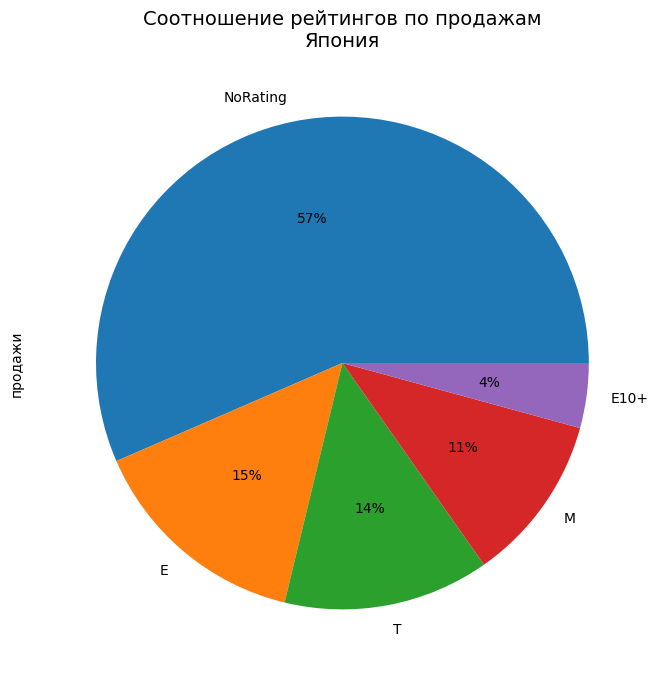

In [61]:
fig_sales('rating', 'jp_sales', 'Япония')

В Японии на первом месте по продажам игры рейтинга NoRating (108.84 млн копий, 57% от всего числа продаж), затем E (28.33 млн копий, 15%), T (26.02 млн копий, 14%), M (21.20 млн копий, 11%) и E10+ (8.19 млн копий, 4%).

В результате анализа можно сделать следующие выводы. В Северной Америке и Европе на первом месте по продажам игры рейтинга M (для лиц старше 17 лет) - 38-39%, что не удивительно, так как у них Shooter на первом месте в топ-5 жанров. В Японии на первом месте оказались игры с нашим синтетическим рейтингом NoRating - 57% от всего количества продаж. Вероятно, это связано с тем, что в Японии, как мы уже выяснили, пользуются большей популярностью платформы японских компаний, и они не маркируют свою продукцию по рейтингу ESRB, который существует для США и Канады.

Кроме того мы снова видим, что топ-5 рейтингов Северной Америки и Европы близки друг другу по расположению рейтингов и по их процентному соотношению, в то время в Японии процентное соотношение рейтингов совершенно другое.

**Вывод:** проанализировали продажи в зависимости от платформы, жанра и рейтига, выявили самые популярные - топ-5 - платформы и жанры, выяснили, как продажи зависят от рейтига игры.

По результатам исследования выяснили, что в Северной Америке и Европе большей популярностью пользуются платформы, выпущенные Microsoft и Sony, при чем в Северной Америке на первом месте X360 компании Microsoft, а в Европе PS4 Sony. В Японии в топ-5 вошли платформы только японских компаний - Nintendo и Sony. Кроме того, в Японии почти 50% продаж игр приходится на портативную приставку 3DS от Nintendo.

Жанровые вкусы пользователей в Северной Америке и Европе практически совпадают - на первых четырех местах в топ-5 расположены одинаковые жанры (самый популятрный - Action) и в том же порядке, при чем и процентное соотношение продаж примерно совпадает. Вкусы жителей Японии отличаются кардинально. На первом месте в Японии Role-Playing, а Action только на втором, в отличие от Северной Америки и Европы. В то же время в топ-5 Японии вообще не попали Shooter, Sports, Racing, но зато есть Simulation и Fighting.

Рейтинг ESRB влияет на продажи в Северной Америке и Европе, там на первом месте по продажам игры рейтинга M (для лиц старше 17 лет) - 38-39% от общего числа продаж. В Японии на первом месте оказались игры с нашим синтетическим рейтингом NoRating - 57% от общего количества продаж. Вероятно, это связано с тем, что в Японии, как мы уже выяснили, пользуются большей популярностью платформы японских компаний, и они не маркируют свою продукцию по рейтингу ESRB, который существует для США и Канады.

Из всего перечисленного можно сделать вывод, что вкусы пользователей Северной Америки и Европы близки, в то время как вкусы пользователей Японии заметно отличаются. Однако и пользователи Северной Америки, и пользователи Японии предпочитают платформы, созданные компаниями их стран.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

За нулевую гипотезу примем утверждение, что средние пользовательские рейтинги платформ Xbox One и PC равны. Альтернативная гипотеза - средние пользовательские рейтинги платформ Xbox One и PC не равны.

Для проверки гипотезы воспользуемся Т-тестом для двух независимых выборок. Уровень статистической значимости 0.05.

In [62]:
# Вычисляем p-value
# Так как у нас в данных много пропусков, добавим параметр nan_policy='omit'
st.ttest_ind(data_new[data_new['platform'] == 'XOne']['user_score']
             , data_new[data_new['platform'] == 'PC']['user_score'], nan_policy='omit').pvalue

0.5535080500642724

In [63]:
# Выведем средние значения выборок
print('Средний пользовательский рейтинг Xbox One:', data_new[data_new['platform'] == 'XOne']['user_score'].mean())
print('Средний пользовательский рейтинг PC:', data_new[data_new['platform'] == 'PC']['user_score'].mean())

Средний пользовательский рейтинг Xbox One: 6.521428571428572
Средний пользовательский рейтинг PC: 6.428640776699029


P-value значительно выше уровня статистической значимости, значит, нулевую гипотезу мы не отвергаем - средние пользовательские рейтинги платформ Xbox One и PC равны. И если мы посмотрим на средние значения наших двух выборок, то увидим, что они очень близки, что тоже подтверждает наш вывод.

#### Средние пользовательские рейтинги жанров Action и Sports разные

За нулевую гипотезу примем утверждение, что средние пользовательские рейтинги жанров Action и Sports равны. Альтернативная гипотеза - средние пользовательские рейтинги жанров Action и Sports не равны.

Для проверки гипотезы воспользуемся Т-тестом для двух независимых выборок. Уровень статистической значимости 0.05.

In [64]:
# Вычисляем p-value
st.ttest_ind(data_new[data_new['genre'] == 'Action']['user_score']
             , data_new[data_new['genre'] == 'Sports']['user_score'], nan_policy='omit').pvalue

4.804523380462158e-26

In [65]:
# Выведем средние значения выборок
print('Средний пользовательский рейтинг жанра Action:', data_new[data_new['genre'] == 'Action']['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports:', data_new[data_new['genre'] == 'Sports']['user_score'].mean())

Средний пользовательский рейтинг жанра Action: 6.825047801147227
Средний пользовательский рейтинг жанра Sports: 5.455670103092784


P-value значительно меньше уровня статистической значимости, значит, нулевую гипотезу мы отвергаем в пользу альтернативной - средние пользовательские рейтинги жанров Action и Sports не равны. И если мы посмотрим на средние значения наших двух выборок, то увидим, что средние рейтинги жанров, действительно, не равны, что тоже подтверждает наш вывод.

**Вывод:** проверили две гипотезы: "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "средние пользовательские рейтинги жанров Action и Sports разные". Обе гипотезы подтвердились.

**Общий вывод:** было проведено исследование данных о продажах игр по всему миру, полученных из открытых источников. Нужно было выявить закономерности, определяющие успешность игр, для планирования компании на 2017 год.

В предоставленных данных были выявлены пропуски, неявные дубликаты и данные с некорректным типом данных. Часть пропусков было удалено, если это было корректно. Пропуски в столбце рейтинга ESRB были заполнены заглушкой. В столбцах с оценками пользователей и критиков пропусков было примерно половина от всего количества значений, было решено ничего с ними не делать, чтобы не исказить данные. Неявные дубликаты были удалены. Тип данных был исправлен на корректный. Кроме того, заголовки столбцов были приведены к нижнему регистру.

Был добавлен дополнительный столбец - суммарные продажи по всем регионам.

Проанализировали, сколько игр выпускалось в разные годы. Был выявлен резкий рост продаж начиная с 2002 года, пик пришелся на 2008-2009 года (больше 140 млн копий в год), затем начался спад. Изучили, как менялись продажи по платформам - выяснили, что платформа живет в среднем 9-10 лет, пик продаж приходится на половину этого срока. Из этого, а так же с учетом того, что нам нужно делать прогноз на следующий год, выбрали актуальный период - с 2012 по 2016 годы. В дальнейшем при анализе использовали данные только за этот период.

В процессе анализа исследовали данные и получили следующие закономерности:
1. Продажи в целом падают, но тем не менее лидерами рынка являются платформы PS4 и XOne, так же хорошие показатели у 3DS и WiiU. Эти платформы перспективны по продажам.
2. Распределение продаж смещено вправо.
3. Чем выше оценка критиков, тем больше проданных копий, хотя связь слабая. В то же время зависимость между оценками пользователей и продажами существует не для всех компаний. Для платформ Nintendo коэффициент корреляции 0.2-0.4 (зависимость слабая прямая), для платформ Microsoft и Sony близок к нулю (зависимости нет).
4. Самые популярные жанры Shooter, Sports и Platform. Самый непопулярный - Adventure. Shooter имеет почти в два раза большее медианное значение продаж, чем Sports. Разница между остальными жанрами не так заметна.

На основе анализа зависимости продаж от жанра, платформы и возрастного рейтинга составили портрет пользователя для трех регионов - Северная Америка, Европа и Япония. Вкусы пользователей Северной Америки и Европы во многом совпадают. На первом месте у них игры в жанре Action и Shooter, затем Sports и Role-Playing. Соответственно, самый популярный возрастной рейтинг - M (для лиц старше 17 лет). В Японии на первом месте Role-Playing, затем Action, Misc, Simulation и Fighting. Пользователи Северной Америки, и пользователи Японии предпочитают платформы, созданные компаниями их стран - 24% продаж в Северной Америке приходится на X360 компании Microsoft, 46% продаж Японии приходится на 3DS компании Nintendo. В Европе предпочитают платформы компании Sony - 28% продаж приходится на PS4.

Проверили две гипотезы: "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "средние пользовательские рейтинги жанров Action и Sports разные". Обе гипотезы подтвердились.

**Рекомендации заказчику:** при планировании компании на 2017 год рекомендуется учитывать жанровые вкусы пользователей в зависимости от региона, популярные возрастные рейтинги, популярные платформы.
1. Для платформ рекомендуется выбрать PS4 и XOne. 
2. Жанр - Shooter для Северной Америки и Европы, рейтинг ESRB - M; Role-Playing - для Японии.
3. Так же нужно учитывать, что оценки критиков, хоть и слабо, но влияют на продажи - можно либо выбирать для продаж игры с высокими оценками, либо (если есть возможность) заказать обзоры игр в специализированных изданиях, интернет-ресурсах и у блогеров.
4. Оценки пользователей влияют, хотя и слабо, на продажи для платформ Nintendo, и не влияют на продажи для других платформ.